# White Wine quality 

Task 1: Data pre-processing and data exploration

a.	Use Pandas to load the data and report the number of data points (rows) in the dataset.

b.	Consider “quality” as class labels. Report the number of features in the dataset and the number of data 
        points in each class.

c.	Perform random permutations of the data using the function, shuffle, from sklearn.utils. You must set a 
        value to the parameter, random_state. Assign the data to a new variable as white_wine.


The details on how to use shuffle can be viewed from the following link: 
        https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html


d.	Produce one scatter plot, that is, one feature against another feature. You are free to choose which two 
        features you want to use.


Task 2: PCA Analysis on the white-wine dataset Using Scikit-Learn

a.	Perform a PCA analysis on the whole white_wine dataset.

b.	Plot the data in the PC1 and PC2 projections and label/colour the data in the plot according to their class 
        labels. Details on how to use matplotlib.pyplot.scatter can be viewed from the following link: 
        

         https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html


c.	Report the variance captured by each principal component.
 

Task 3: Divide the white_wine dataset into a training set, a validation set, and a test set.

a.	Take out the first 1000 rows from white_wine and save it as the validation set.

b.	Take out the last 1000 rows from white_wine and save it as the test set.

c.	Save the rest of rows from white_wine as the training set.


In [ ]:
import numpy as np  # for arrays
import pandas as pd # for dataframes, data cleaning 
import seaborn as sb
import matplotlib.pyplot as plt # seaborn and matplotlib for data exploration, analysis, visualization.


df = pd.read_csv('/content/winequality-white.csv',sep = ';') 

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
df.shape

(4898, 12)

there are total 4898 rows, 12 columns in the given dataset.

In [ ]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df = df.rename(columns= lambda i :i.replace(' ','_')) # to rremove spaces in column names

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


there are no null values in the dataset, everything expect quality column is of Float Datatype 

considering the Quality column as target, there are 11 more columns(features) effecting the Quality column.

In [ ]:
features = df.columns[:-1]

for i in features:
  
  print('The number of unique data points in {}'.format(i) + " are " + str(len(df['{}'.format(i)].unique())))

The number of unique data points in fixed_acidity are 68
The number of unique data points in volatile_acidity are 125
The number of unique data points in citric_acid are 87
The number of unique data points in residual_sugar are 310
The number of unique data points in chlorides are 160
The number of unique data points in free_sulfur_dioxide are 132
The number of unique data points in total_sulfur_dioxide are 251
The number of unique data points in density are 890
The number of unique data points in pH are 103
The number of unique data points in sulphates are 79
The number of unique data points in alcohol are 103


In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
from sklearn.utils import shuffle

white_wine = shuffle(df , random_state= 17)

In [ ]:
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1682,7.2,0.25,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,7
4181,6.6,0.25,0.32,5.6,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
1992,7.0,0.12,0.28,6.3,0.057,17.0,103.0,0.99570,3.50,0.44,9.6,5
4239,5.7,0.28,0.36,1.8,0.041,38.0,90.0,0.99002,3.27,0.98,11.9,7
600,6.7,0.30,0.35,1.4,0.180,36.0,160.0,0.99370,3.11,0.54,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2800,6.6,0.25,0.51,8.0,0.047,61.0,189.0,0.99604,3.22,0.49,9.2,5
1337,6.7,0.18,0.30,6.4,0.048,40.0,251.0,0.99560,3.29,0.52,10.0,5
406,5.8,0.28,0.34,4.0,0.031,40.0,99.0,0.98960,3.39,0.39,12.8,7
2191,9.2,0.23,0.35,10.7,0.037,34.0,145.0,0.99810,3.09,0.32,9.7,5


In [ ]:
white_wine.reset_index()

wine_df = white_wine.copy(deep= True)


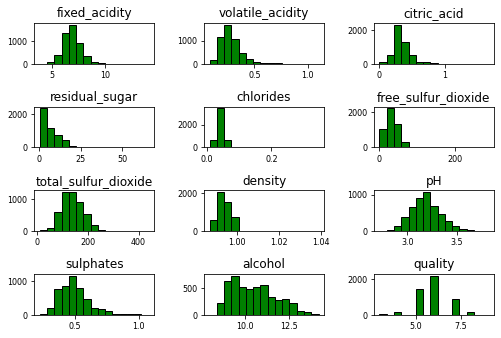

In [ ]:
# to know the data distribution in each feature

df.hist(bins=15, color='green', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

fixed acidity , chlorides, ph features have normal distribution 

volatile acidity, citric acid, residual sugar, sulphates features have left sided skewedness

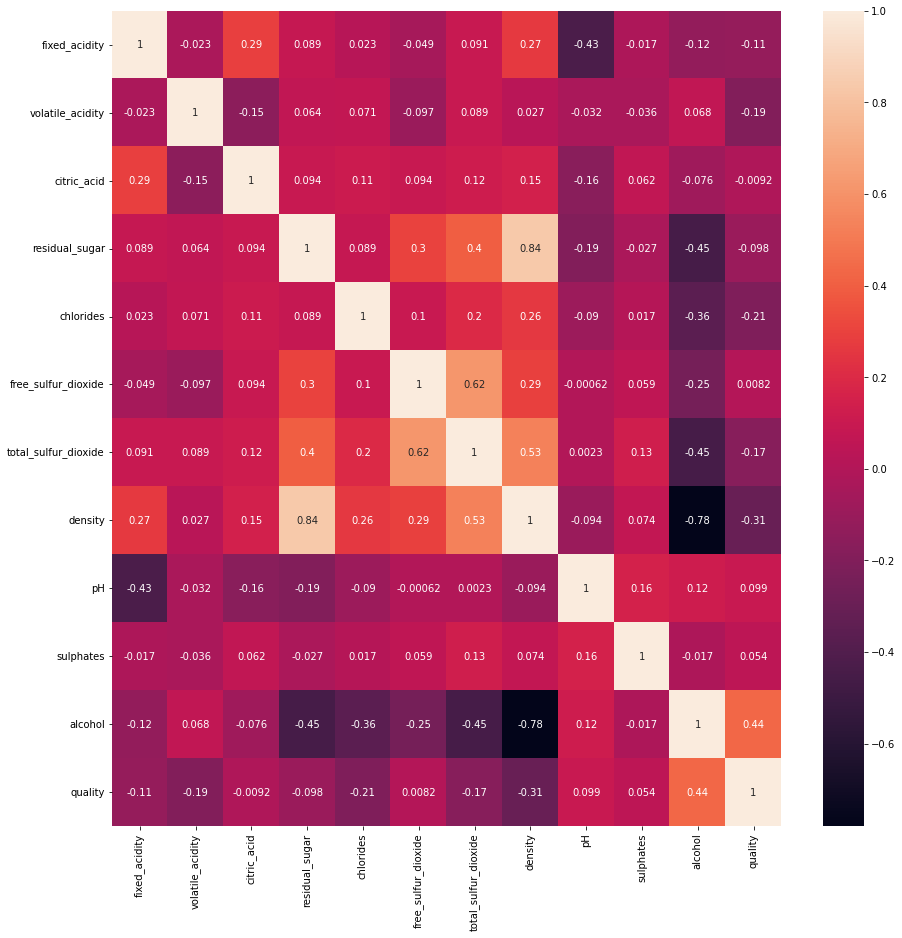

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# from this heatmap we can see that there is a high correlation between density, residual sugar and high negative correlation between density , alcohol


def s_plot(x_axis, y_axis):
  plt.figure(figsize=(10,10))
  plt.scatter(x = df[:][x_axis] , y = df[:][y_axis] )
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(x_axis + " vs " + y_axis)
  plt.show()

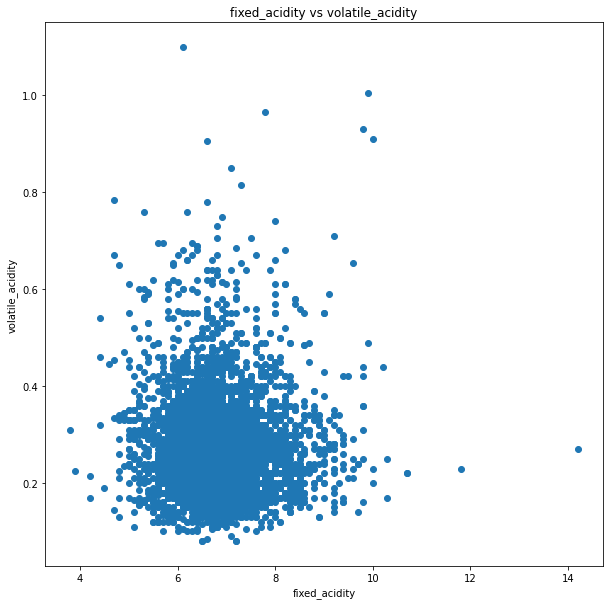

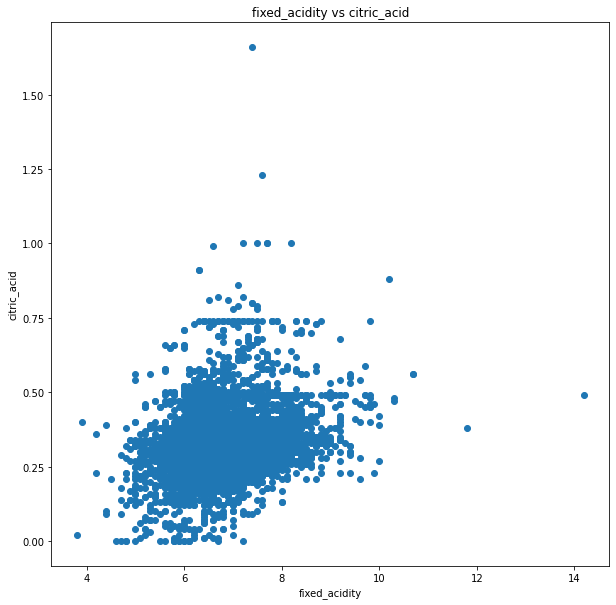

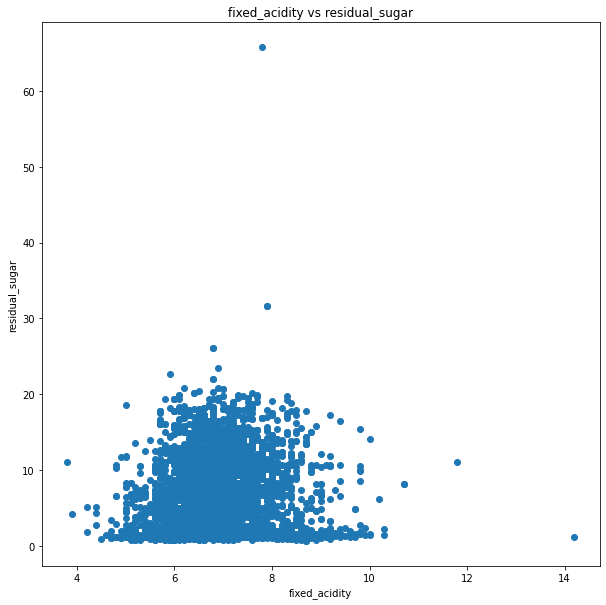

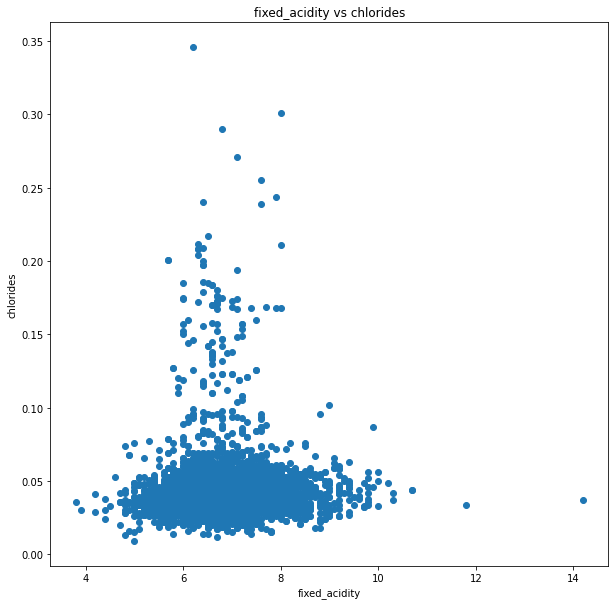

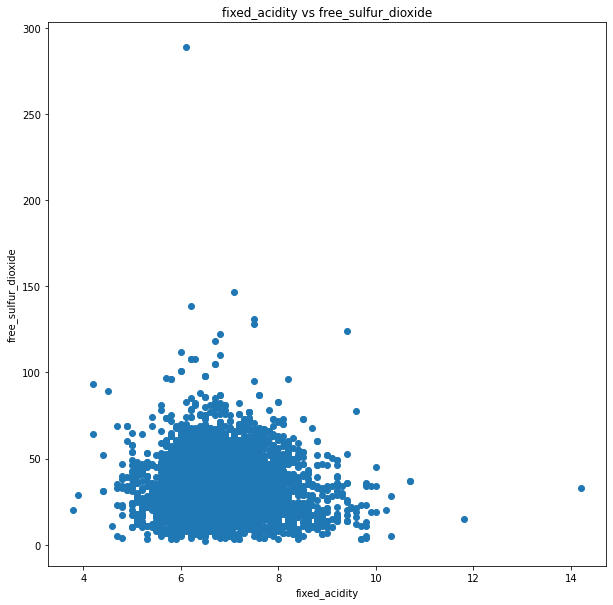

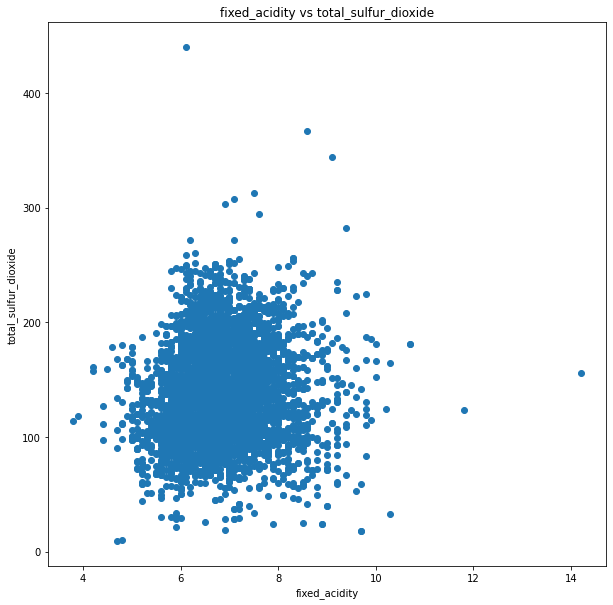

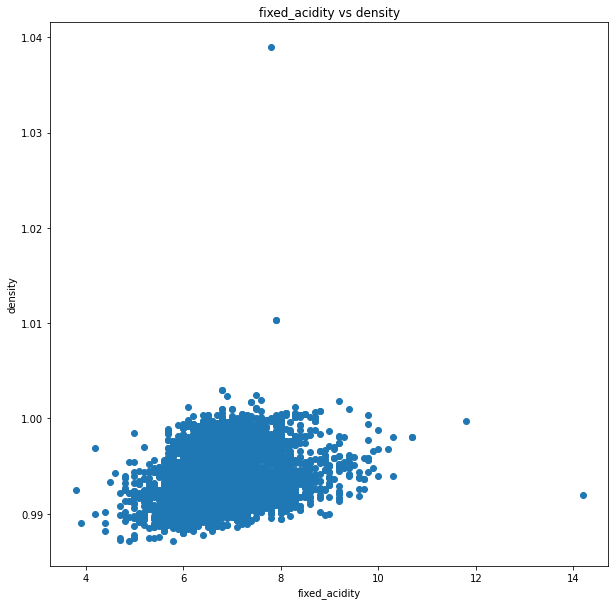

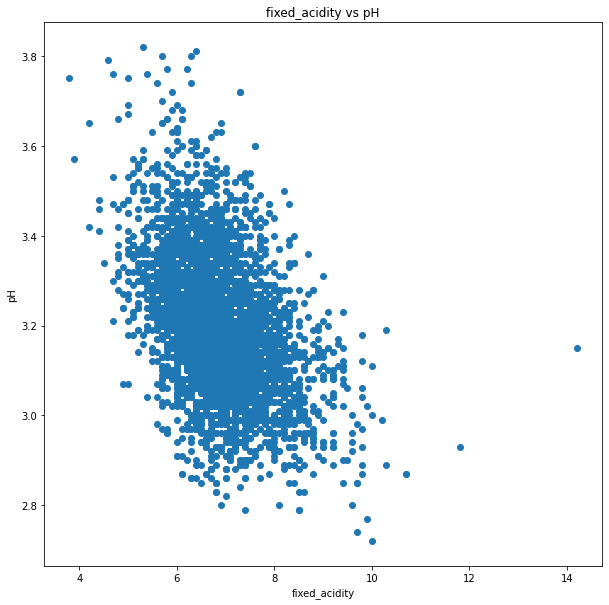

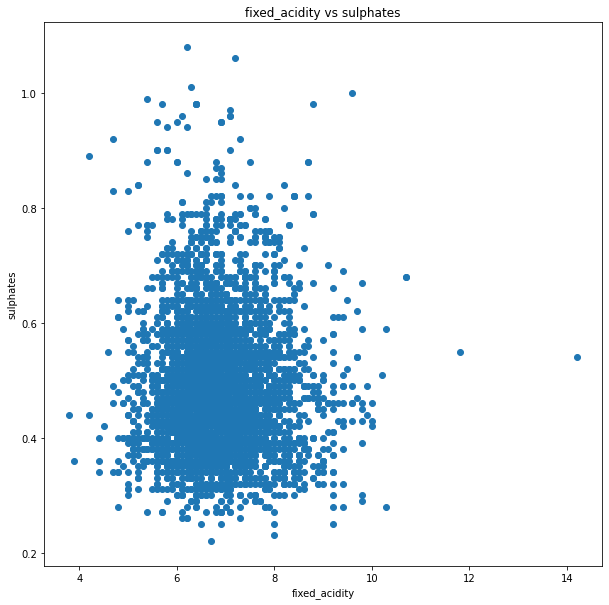

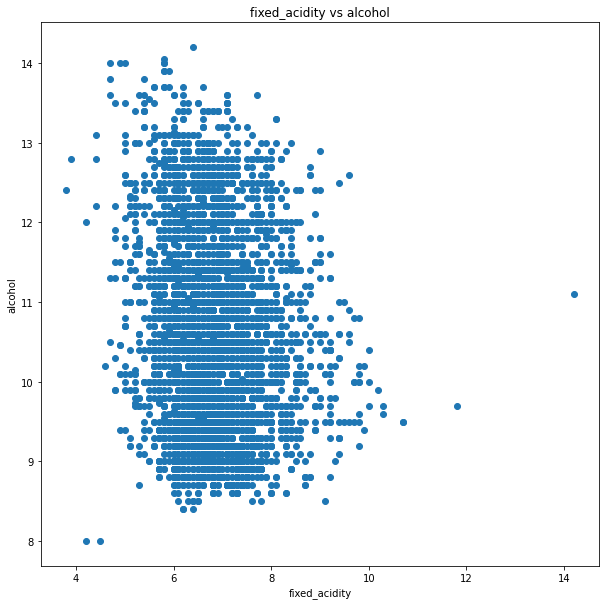

In [ ]:
# i took fixed_acidity as a primary feature and plotted scatterplots vs other features 
for i in features[1:]:
  s_plot('fixed_acidity',i) 

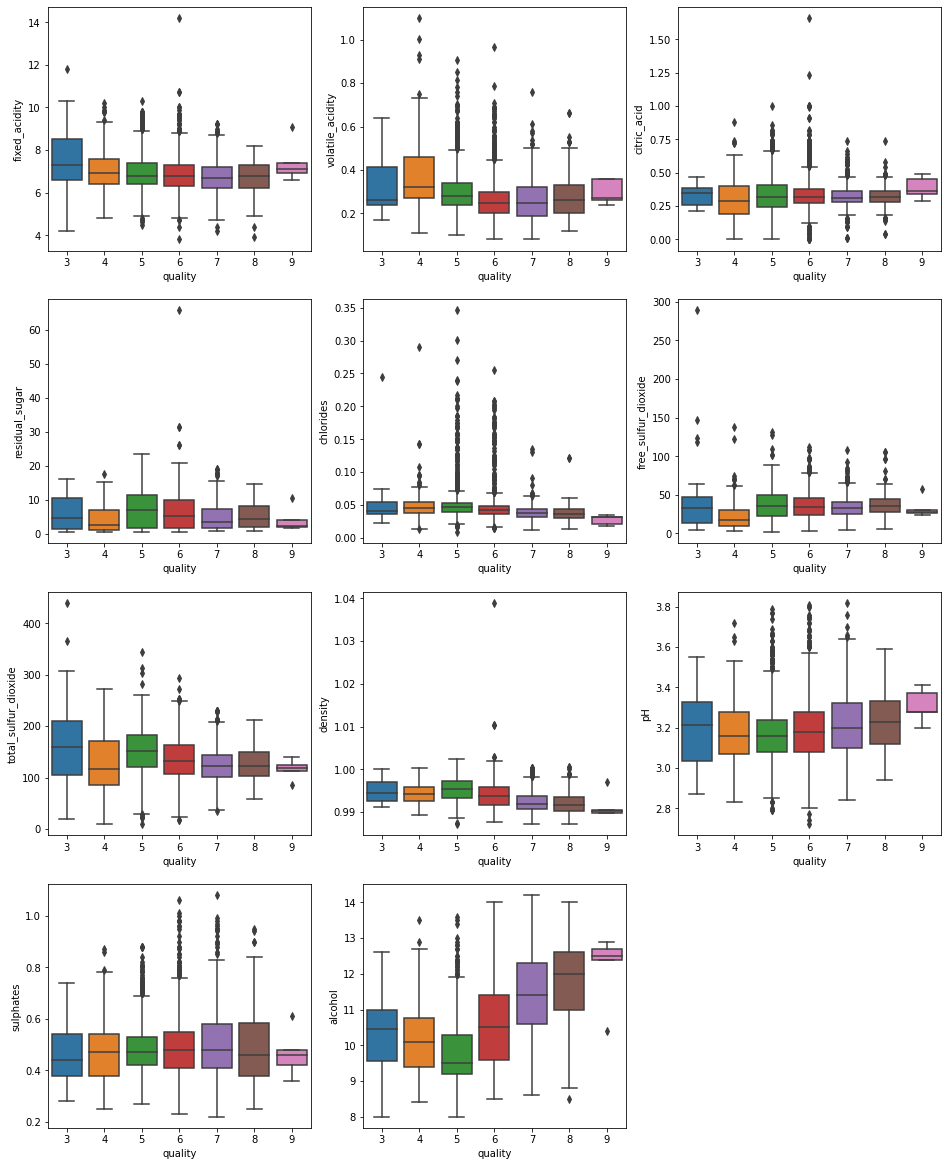

In [ ]:
features_ = df.columns.values[:-1]
fig= plt.figure(figsize=(16,26))
for column,feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sb.boxplot(data=df,x='quality',y=feature)
plt.show()

# PCA

In [ ]:
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_data = preprocessing.scale(df)

In [ ]:
scaled_data

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [ ]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

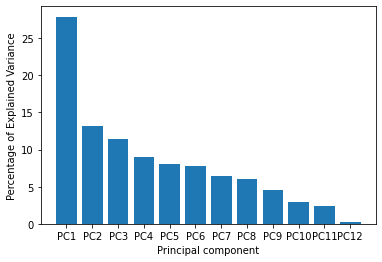

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(i) for i in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height= per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca_data, columns =labels)

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868,-0.891770,0.936900,-0.069991,-0.593900,-0.000135,0.044828,0.049619
1,-0.612800,0.289411,0.816434,0.848734,-0.527425,-0.466481,0.215699,0.452790,0.310059,-1.233989,-0.043194,0.141441
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209,-0.493458,0.184178,0.566042,1.113311,0.389581,-0.827464,-0.178330
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,0.363931,-0.040929
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,0.363931,-0.040929
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-2.075943,0.322175,0.108275,0.443837,-0.755969,-0.280647,-0.163147,-0.073721,-0.261058,0.045920,-0.053601,0.019724
4894,1.479426,0.406234,0.353999,-0.144866,0.163807,0.828166,-0.712011,0.201921,-0.603735,0.053915,-0.372767,-0.107701
4895,-0.751632,-0.511206,0.615696,-0.250844,-0.807127,0.138658,-0.380348,-1.560692,-0.551499,-1.066088,-0.503707,0.116500
4896,-3.622997,0.939777,0.002756,-0.845937,-0.186136,0.491603,0.316834,0.909011,-0.093869,-0.362012,0.556287,0.025557


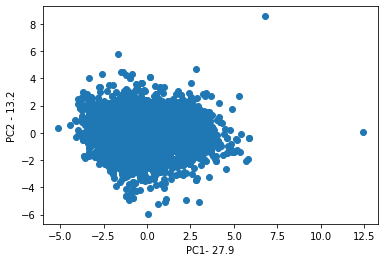

In [ ]:
plt.scatter(pca_df.PC1 , pca_df.PC2)
plt.xlabel('PC1- {}'.format(per_var[0]))
plt.ylabel('PC2 - {}'.format(per_var[1]))


plt.show()

In [ ]:
loading_scores = pd.Series(pca.components_[0], index = df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

print(sorted_loading_scores)

density                 0.501296
alcohol                 0.442795
residual_sugar          0.406053
total_sulfur_dioxide    0.390441
free_sulfur_dioxide     0.274719
quality                 0.227137
chlorides               0.217544
fixed_acidity           0.156904
citric_acid             0.132944
pH                      0.130037
sulphates               0.033642
volatile_acidity        0.024287
dtype: float64


so Density is main factor and then alcohol.

In [ ]:
# importing some  ML models from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR

# some preprocessing functions and model analyzers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, plot_confusion_matrix


In [ ]:
scaler = StandardScaler()
wine_df_2 = pd.DataFrame(scaler.fit_transform(wine_df), columns = wine_df.columns)

In [ ]:
wine_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [ ]:
validation_set = wine_df_2.iloc[:1000]
test_set = wine_df_2.iloc[-1000:]
train_set = wine_df_2.iloc[1000: (df.shape[0] - 1000) ]

In [ ]:
print(validation_set.shape)
print(test_set.shape)
print(train_set.shape)

(1000, 12)
(1000, 12)
(2898, 12)


In [ ]:
x_train = train_set.drop('quality', axis = 1)
y_train = train_set['quality']

In [ ]:
x_validation = validation_set.drop('quality', axis =1)
y_validation = validation_set['quality']

In [ ]:
def model_maker(model):
  print(model)
  ml_model = model
  ml_model.fit(x_train,y_train)
  ml_model.predict(x_validation)
  score = ml_model.score(x_validation, y_validation)
  print(score)

In [ ]:
models = [RandomForestRegressor(), LinearRegression(), LinearSVR(), SVR()]

In [ ]:
for i in models:
  model_maker(i)

RandomForestRegressor()
0.524703652956958
LinearRegression()
0.2933477009051091
LinearSVR()
0.28519845979092495
SVR()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.41081142933161363


In [ ]:
# seems to be random forestclassifier is having a high score

x_test = test_set.drop('quality', axis =1)
y_test = test_set['quality']

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.predict(x_test)
score = model.score(x_test, y_test)

score

0.4783063245380955